# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Preprocessing

In [ ]:
data=pd.read_csv('/content/diabetes_data_upload.csv')

In [ ]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
# Checking for null values
data.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
#Columns present along with their unique values in their respective fields
{column: len(data[column].unique()) for column in data.columns}

{'Age': 51,
 'Gender': 2,
 'Polyuria': 2,
 'Polydipsia': 2,
 'sudden weight loss': 2,
 'weakness': 2,
 'Polyphagia': 2,
 'Genital thrush': 2,
 'visual blurring': 2,
 'Itching': 2,
 'Irritability': 2,
 'delayed healing': 2,
 'partial paresis': 2,
 'muscle stiffness': 2,
 'Alopecia': 2,
 'Obesity': 2,
 'class': 2}

In [ ]:
#Changing the Categorical variables like "yes/no" & "positive/negative" to numerical categorical variables like 0/1
#Using LabelEncoder
label_encoder=LabelEncoder()
data["class"]=label_encoder.fit_transform(data["class"])
data["Gender"]=label_encoder.fit_transform(data["Gender"])
data["Polyuria"]=label_encoder.fit_transform(data["Polyuria"])
data["Polydipsia"]=label_encoder.fit_transform(data["Polydipsia"])
data["sudden weight loss"]=label_encoder.fit_transform(data["sudden weight loss"])
data["weakness"]=label_encoder.fit_transform(data["weakness"])
data["Polyphagia"]=label_encoder.fit_transform(data["Polyphagia"])
data["Genital thrush"]=label_encoder.fit_transform(data["Genital thrush"])
data["visual blurring"]=label_encoder.fit_transform(data["visual blurring"])
data["Itching"]=label_encoder.fit_transform(data["Itching"])
data["Irritability"]=label_encoder.fit_transform(data["Irritability"])
data["delayed healing"]=label_encoder.fit_transform(data["delayed healing"])
data["partial paresis"]=label_encoder.fit_transform(data["partial paresis"])
data["muscle stiffness"]=label_encoder.fit_transform(data["muscle stiffness"])
data["Alopecia"]=label_encoder.fit_transform(data["Alopecia"])
data["Obesity"]=label_encoder.fit_transform(data["Obesity"])

In [ ]:
# Changed data :
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


# Exploratory Data Analysis (EDA)

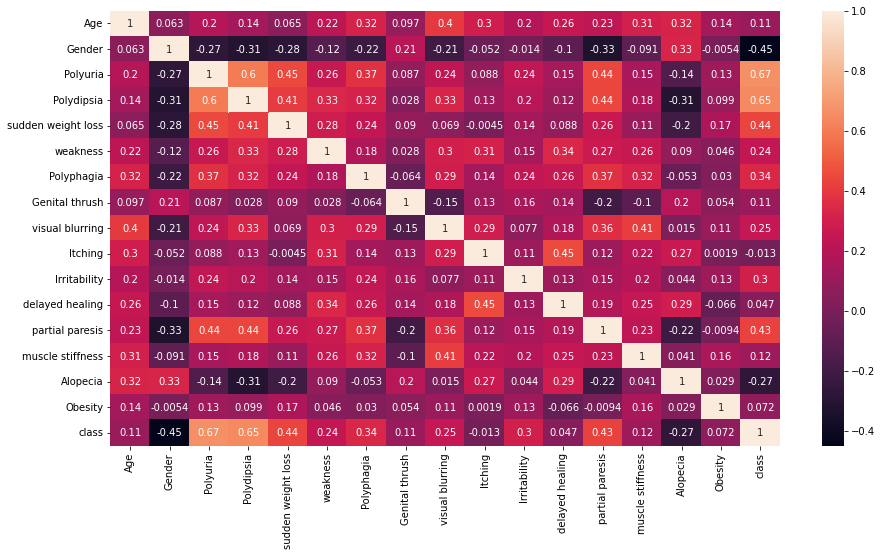

In [ ]:
#HeatMap
corrdata = data.corr()
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corrdata,annot=True)

In [ ]:
# Function for Pie Plot
def plotPie(value, title, label):
    plt.figure(figsize=(4,4))
    plt.pie(
        value.value_counts(),
        startangle=90,
        labels = label,
        autopct=(lambda p:f'{p:.2f}%\n{p*sum(value.value_counts())/100 :.0f} items')
    )
    plt.title(title)
    plt.show()

<Figure size 360x360 with 0 Axes>

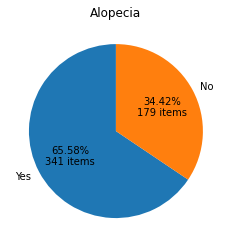

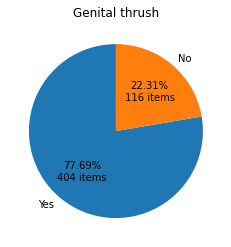

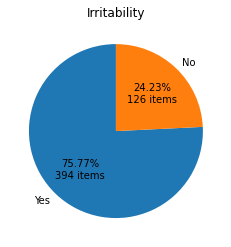

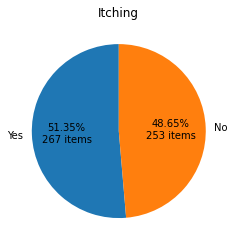

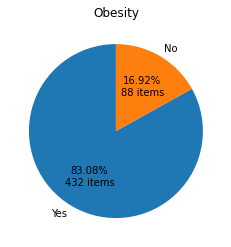

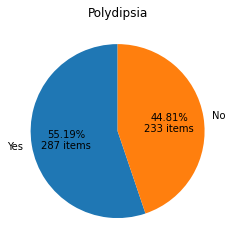

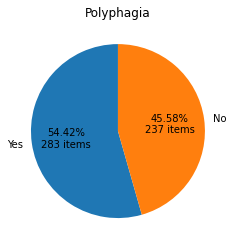

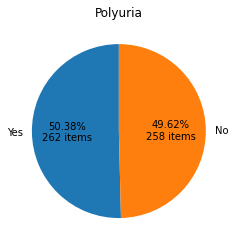

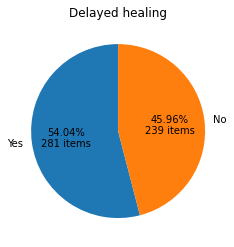

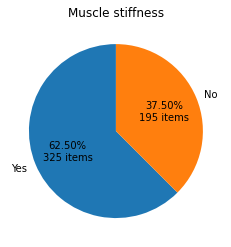

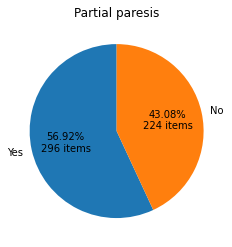

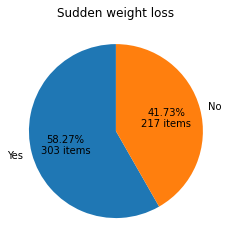

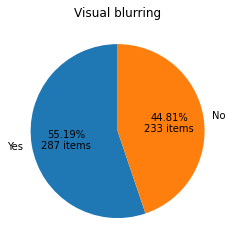

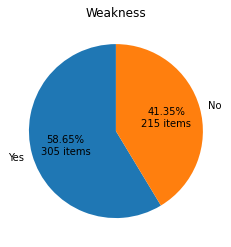

In [ ]:
data_symptoms = data[data.columns.difference(["Age", "class", "Gender"])]
plt.figure(figsize=(5,5))

for column in data_symptoms.columns:
    plotPie(data_symptoms[column], column.capitalize(), ["Yes", "No"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


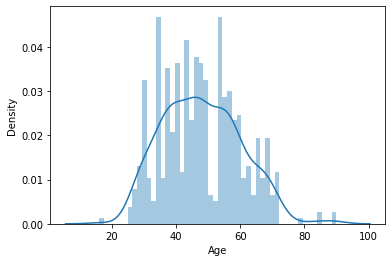

In [ ]:
# Age distribution 
sns.distplot(data['Age'],bins=50)

# Splitting Data set into training and testing 

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train

array([[35,  0,  1, ...,  1,  0,  0],
       [64,  1,  0, ...,  1,  1,  0],
       [66,  1,  0, ...,  0,  1,  0],
       ...,
       [70,  1,  0, ...,  0,  1,  0],
       [48,  1,  1, ...,  0,  0,  0],
       [64,  1,  0, ...,  0,  0,  0]])

In [ ]:
y_train

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_test

array([[ 1.59123539,  0.78202957, -1.01030955, ...,  1.31425748,
         1.40609361,  2.23606798],
       [-0.09627461,  0.78202957,  0.98979565, ...,  1.31425748,
        -0.7111902 , -0.4472136 ],
       [-0.43377661, -1.27872403,  0.98979565, ...,  1.31425748,
        -0.7111902 ,  2.23606798],
       ...,
       [-0.09627461,  0.78202957, -1.01030955, ..., -0.76088591,
         1.40609361, -0.4472136 ],
       [-0.09627461,  0.78202957, -1.01030955, ..., -0.76088591,
         1.40609361, -0.4472136 ],
       [ 1.42248439, -1.27872403, -1.01030955, ..., -0.76088591,
         1.40609361, -0.4472136 ]])

In [ ]:
y_test

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

# Creating Various Machine Learning models

In [ ]:
# Initializing two empty lists to append all model's name and corresponding name
acc = []
model = []

#   1.Logistic Regression

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state=2)
LogReg.fit(X_train,y_train)
predicted_values = LogReg.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.9384615384615385
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        56
           1       0.93      0.96      0.95        74

    accuracy                           0.94       130
   macro avg       0.94      0.94      0.94       130
weighted avg       0.94      0.94      0.94       130



#   2.K-Nearest Neighbours(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
predicted_values = classifier.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K-Nearest Neighbour')
print("KNN's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN's Accuracy is:  0.9076923076923077
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        56
           1       0.94      0.89      0.92        74

    accuracy                           0.91       130
   macro avg       0.90      0.91      0.91       130
weighted avg       0.91      0.91      0.91       130



#   3.Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC
SVM = SVC(gamma='auto')
SVM.fit(X_train,y_train)
predicted_values = SVM.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)
print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.9769230769230769
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.97      0.99      0.98        74

    accuracy                           0.98       130
   macro avg       0.98      0.98      0.98       130
weighted avg       0.98      0.98      0.98       130



#   4.Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.9230769230769231
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        56
           1       0.91      0.96      0.93        74

    accuracy                           0.92       130
   macro avg       0.93      0.92      0.92       130
weighted avg       0.92      0.92      0.92       130



#   5.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  94.61538461538461
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        56
           1       0.95      0.96      0.95        74

    accuracy                           0.95       130
   macro avg       0.95      0.94      0.94       130
weighted avg       0.95      0.95      0.95       130



#   6.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.9923076923076923
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       1.00      0.99      0.99        74

    accuracy                           0.99       130
   macro avg       0.99      0.99      0.99       130
weighted avg       0.99      0.99      0.99       130



# Accuracy Comparison

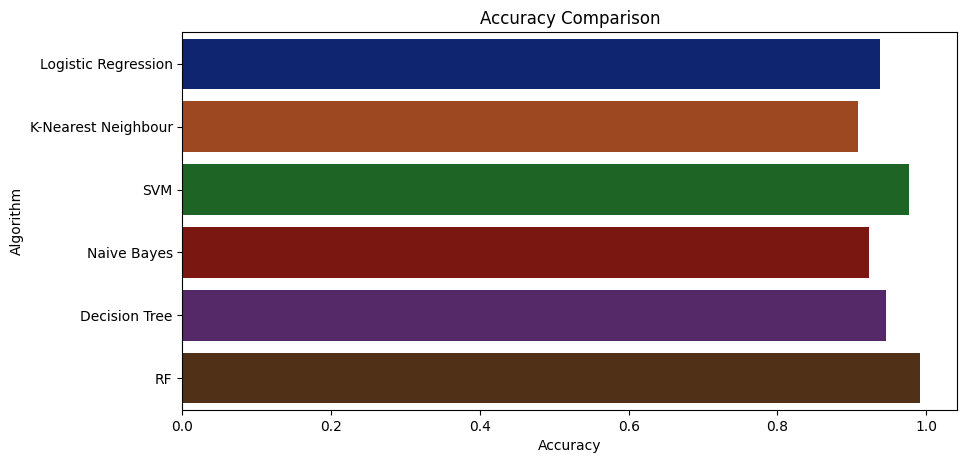

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Logistic Regression --> 0.9384615384615385
K-Nearest Neighbour --> 0.9076923076923077
SVM --> 0.9769230769230769
Naive Bayes --> 0.9230769230769231
Decision Tree --> 0.9461538461538461
RF --> 0.9923076923076923


Random Forest and SVM have the highest accuracies of 0.99 and 0.9769 respectively

So we chose Random Forest for Early prediction of Diabetes